In [ ]:
%pip install numpy pandas matplotlib seaborn scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Ba mo hinh
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report # Danh gia hieu suat mo hinh tren tung loai cam xuc

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Cleaned data file

In [39]:
# Đọc file CSV, bỏ qua dòng tiêu đề
df = pd.read_csv("cleaned_data.csv", skiprows=1, header=None)

# Ghi ra file mới không có tiêu đề
df.to_csv("emotion_data.csv", index=False, header=False)


In [40]:
data_train = pd.read_csv('cleaned_data.csv',sep=',',encoding ='utf-8')
print("Dataset shape: ", data_train.shape)

Dataset shape:  (68871, 2)


C:\Users\Hi Windows 10\AppData\Local\Temp\ipykernel_14876\636796690.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Emotions", y="Count", data=count_df, alpha=0.8, palette="plasma")


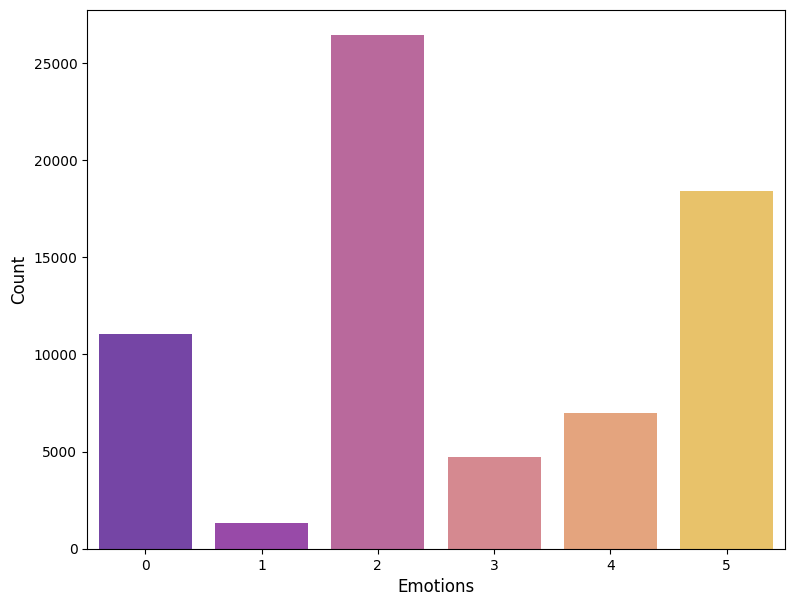

In [41]:
count  = data_train.iloc[:,1].value_counts()
plt.figure(figsize=(9,7))
count_df = count.reset_index()
count_df.columns = ['Emotions', 'Count']
sns.barplot(x="Emotions", y="Count", data=count_df, alpha=0.8, palette="plasma")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()
# 0 = neutral
# 1 = happy
# 2 = sad
# 3 = love
# 4 = anger

Test Train Split

In [42]:

X_train = data_train.iloc[:,0][:49611]
#[:47583]
y_train = data_train.iloc[:,-1][:49611]
#[:47583]
X_val = data_train.iloc[:,0][49612:]
#[47584:]
y_val = data_train.iloc[:,-1][49612:]
#[47584:]

count_vect.fit_transform():
- count_vect là một đối tượng của CountVectorizer(), một kỹ thuật trong xử lý ngôn ngữ tự nhiên (NLP)
- fit_transform() thực hiện hai công việc:
fit: học từ điển từ tập dữ liệu văn bản
transform: chuyển đổi văn bản thành ma trận số liệu
data_train.iloc[:,0].astype('U'):
- Trích xuất cột đầu tiên trong data_train (có thể là cột chứa văn bản)
- .astype('U') chuyển dữ liệu thành chuỗi Unicode (đề phòng lỗi nếu dữ liệu có kiểu khác)

In [43]:
# Extracting Count Vectors Parameters
count_vect= CountVectorizer(analyzer='word')
count_vect.fit(data_train.iloc[:,0].astype('U'))
X_train_count=  count_vect.transform(X_train.astype('U'))
X_val_count=  count_vect.transform(X_val.astype('U'))
print(count_vect.vocabulary_)



{'game': 7641, 'hurt': 9221, 'right': 16188, 'dont': 5553, 'care': 2858, 'fuck': 7503, 'em': 6045, 'man': 11447, 'love': 11233, 'reddit': 15651, 'name': 12525, 'nowhere': 13029, 'near': 12609, 'falcon': 6716, 'consider': 3924, 'it': 10051, 'important': 9471, 'document': 5482, 'know': 10533, 'damn': 4584, 'thing': 19296, 'backwards': 1404, 'forward': 7349, 'thanks': 19199, 'help': 8733, 'isnt': 10031, 'big': 1885, 'he': 8626, 'still': 18371, 'quite': 15297, 'popular': 14570, 'ive': 10083, 'heard': 8652, 'content': 3975, 'never': 12724, 'watch': 21127, 'much': 12386, 'thats': 19217, 'crazy': 4267, 'go': 7969, 'super': 18669, 'religion': 15819, 'high': 8814, 'school': 16811, 'think': 19303, 'remember': 15850, 'girl': 7877, 'entire': 6210, 'year': 21799, 'become': 1714, 'teen': 19059, 'mom': 12197, 'adorable': 247, 'asf': 1060, 'sponge': 18122, 'blurb': 2112, 'pub': 15115, 'quaw': 15264, 'haha': 8393, 'gurr': 8334, 'ha': 8359, 'aa': 1, 'finale': 7041, 'real': 15532, 'mention': 11815, 'trig

In [44]:
print(X_train_count)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 331758 stored elements and shape (49611, 21993)>
  Coords	Values
  (0, 7641)	1
  (0, 9221)	1
  (1, 2858)	1
  (1, 5553)	1
  (1, 6045)	1
  (1, 7503)	1
  (1, 16188)	1
  (2, 11233)	1
  (2, 11447)	1
  (2, 15651)	1
  (3, 6716)	1
  (3, 12525)	1
  (3, 12609)	1
  (3, 13029)	1
  (4, 1404)	1
  (4, 3924)	1
  (4, 4584)	1
  (4, 5482)	1
  (4, 7349)	1
  (4, 8733)	1
  (4, 9471)	1
  (4, 10051)	1
  (4, 10533)	1
  (4, 16188)	1
  (4, 19199)	1
  :	:
  (49607, 7969)	2
  (49607, 10533)	1
  (49607, 12724)	1
  (49607, 15817)	1
  (49607, 18491)	1
  (49607, 21891)	1
  (49608, 1809)	1
  (49608, 3361)	1
  (49608, 5242)	1
  (49608, 7627)	1
  (49608, 10983)	1
  (49608, 11176)	1
  (49608, 11306)	1
  (49608, 13933)	1
  (49608, 15582)	1
  (49608, 17898)	1
  (49608, 21831)	1
  (49609, 15527)	1
  (49609, 19199)	1
  (49610, 12517)	1
  (49610, 14493)	1
  (49610, 15850)	1
  (49610, 19317)	1
  (49610, 20604)	1
  (49610, 21598)	1


word_freq = dict(zip(count_vect.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))
- count_vect.get_feature_names_out(): lấy danh sách tất cả các từ trong từ điển
- bow.sum(axis = 0): 
    - Tổng số lần xuất hiện của mỗi từ trong tất cả các văn bản
    - axis = 0: cộng dọc theo cột (tính tổng số lần xuất hiện của từng từ trong toàn bộ dữ liệu)
- ravel(): chuyển đổi ma trận thành mảng ID
- zip(): ghép danh sách từ với danh sách số lần xuất hiện
- dict(): chuyển kết quả thành từ điển {word: frequency}

(68871, 21993)


C:\Users\Hi Windows 10\AppData\Local\Temp\ipykernel_14876\2886573375.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="word", y="freq", data= word_counter_df, ax=ax, palette="plasma")


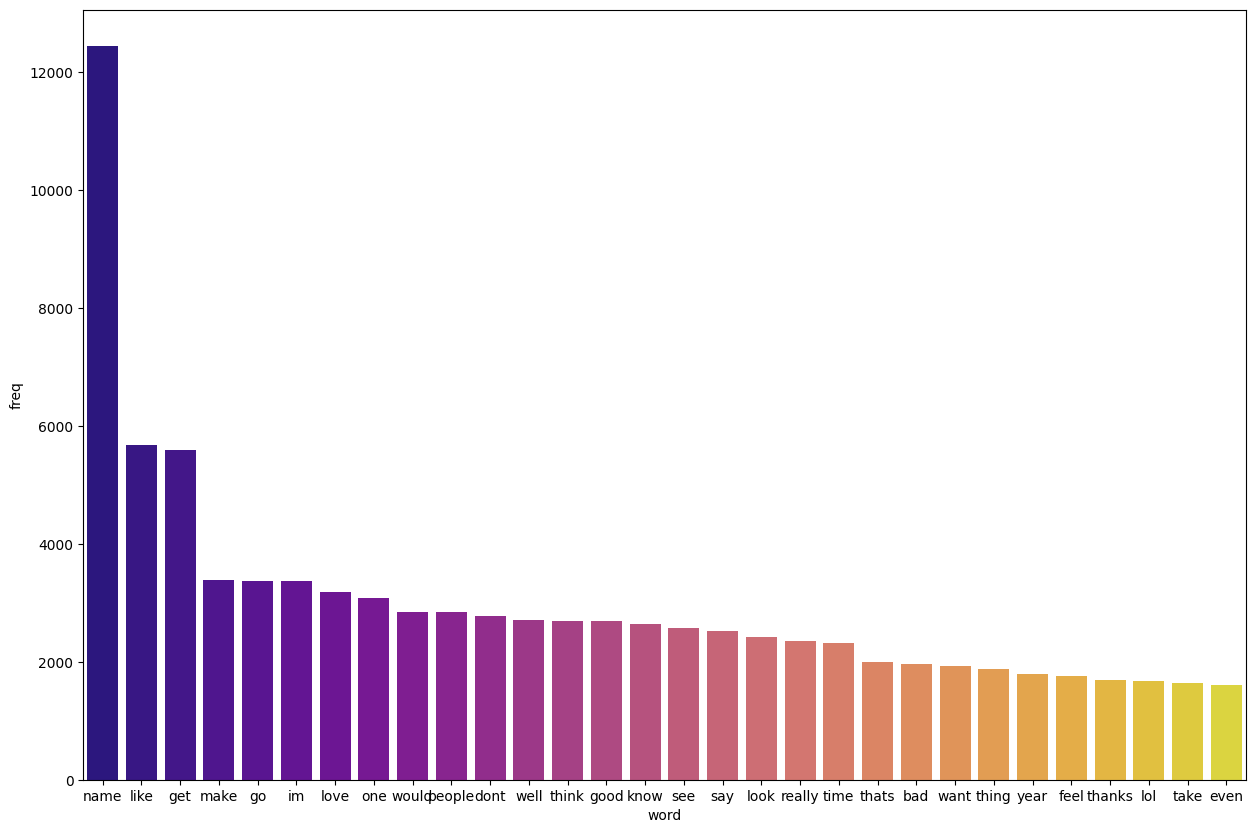

In [45]:
bow = count_vect.fit_transform(data_train.iloc[:,0].astype('U'))
print(bow.shape)
word_freq = dict(zip(count_vect.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(30), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="word", y="freq", data= word_counter_df, ax=ax, palette="plasma")
plt.show()

Buiding models using different classifiers (Count vectorizer)

Model 1: Multinomial Naive Bayes Classifier

In [46]:
nb1= MultinomialNB()
nb1.fit(X_train_count, y_train)
y_pred= nb1.predict(X_val_count)
print('naive bayes count vectors accuracy %s'% accuracy_score(y_pred, y_val))

naive bayes count vectors accuracy 0.4841892102393686


Model 2:  Logistic regression

In [47]:
logreg1= LogisticRegression(C=1, max_iter=500)
logreg1.fit(X_train_count, y_train)
y_pred= logreg1.predict(X_val_count)
print('log reg count vectors accuracy %s'% accuracy_score(y_pred, y_val))

log reg count vectors accuracy 0.5223012617477543


Model 3: Model Linear Support Visual Model

In [48]:
lsvm1 = SGDClassifier(alpha=0.001, random_state=5, max_iter=2, tol=None)
lsvm1.fit(X_train_count, y_train)
y_pred = lsvm1.predict(X_val_count)
print('lsvm using count vectors accuracy %s' % accuracy_score(y_pred, y_val))
   

lsvm using count vectors accuracy 0.5158107897606314


In [ ]:
print(y_pred[:8])
print(y_val[:8])
print(y_pred[-8:])
print(y_val[-8:])
print(X_train_count.shape)
print(X_val_count.shape)   
print(y_train.shape)
print(X_train[:6])

In [50]:
tweets = pd.DataFrame(["For instance, giving a kiss to your younger sibling daily after waking up in the morning and showing him how much you love them. For some happiness means loving life and seeing others happy. While some finds happiness in writing stories. Some conquer happiness in being simple yet the best person they can ever be. Everyone has their own unique way to feel happy by finding things that they never expected to find.", # happy
        "Love is the key to happiness. We all want to lead a happy life. People look around for happiness in power, fashion, wealth, drugs etc. But these things can only give temporary pleasures. The power of love can create miracles. Love can create unity among nations and its citizens. Love is the most beautiful feeling in the world. Love has given different meaning by different people depending upon how they have experienced this wonderful feeling.", # love
        "One day I was studying in my room when, all of a sudden, i heard hot words being exchanged between two persons in the street. I paid no attention, thinking it would be a minor quarrel but soon I heard the voices of a large number of people. I peeped from the window and saw that there was a street quarrel. I went downstairs and reached the spot in the twinkling of an eyes. I was at my wits end on seeing that both of them had come to blows. The people were standing around them and enjoying their quarrel but none tried to pacify them.", # sad
        "I am so angry at you!!!!!", # anger
        "you ve hit a new low with a danger of blm fascist slogan please stop it before too late stop", # anger
        "I love my doggg", # love
        "I think i'm gonna be sick :'‑(", # sad
        "I hate you so much", # anger
        "I'm at work", # neutral
        "@TheTombert i was watching Harpers Island, lol... there was no vodka involved", # neutral
        "sometimes i wish things could go back to the way they were the beginning of last summer", # sad
        "it's your 18th birthday finally!!! yippeeeee", # happy
        "still waiting in line", # neutral
        "aarrgghh - fu*k.....a hose has leaked water all over the new floating floor", # anger
        "that b*tch is so ugly", # anger
        "oh no he is hospitalised!!!", # sad
       ])

tweet_count = count_vect.transform(tweets[0])

In [51]:
#Predicting the emotion of the tweet 
tweet_pred = logreg1.predict(tweet_count)
print(tweet_pred)
tweets[0]
# 0 = anger
# 1 = fear
# 2 = joy
# 3 = sad
# 4 = surprise
# 5 = neutral


[5 2 5 0 0 2 2 0 5 2 5 5 5 5 5 5]


0     For instance, giving a kiss to your younger si...
1     Love is the key to happiness. We all want to l...
2     One day I was studying in my room when, all of...
3                             I am so angry at you!!!!!
4     you ve hit a new low with a danger of blm fasc...
5                                       I love my doggg
6                        I think i'm gonna be sick :'‑(
7                                    I hate you so much
8                                           I'm at work
9     @TheTombert i was watching Harpers Island, lol...
10    sometimes i wish things could go back to the w...
11         it's your 18th birthday finally!!! yippeeeee
12                                still waiting in line
13    aarrgghh - fu*k.....a hose has leaked water al...
14                                that b*tch is so ugly
15                          oh no he is hospitalised!!!
Name: 0, dtype: object

In [52]:
final_result=tweets.copy()

In [53]:
final_result['result']=tweet_pred
final_result=final_result.rename(columns={0:"tweets"})
final_result=final_result.rename(columns={"result":"predicted_emotion"})
final_result=final_result.replace({0: 'Anger', 1: 'Fear', 2: 'Joy', 3: 'Sad', 4: 'Suprise', 5: 'Neutral'})
final_result

,tweets,predicted_emotion
0,"For instance, giving a kiss to your younger si...",Neutral
1,Love is the key to happiness. We all want to l...,Joy
2,"One day I was studying in my room when, all of...",Neutral
3,I am so angry at you!!!!!,Anger
4,you ve hit a new low with a danger of blm fasc...,Anger
5,I love my doggg,Joy
6,I think i'm gonna be sick :'‑(,Joy
7,I hate you so much,Anger
8,I'm at work,Neutral
9,"@TheTombert i was watching Harpers Island, lol...",Joy


In [69]:
test=pd.DataFrame(["Today is March 8th. I bought a flower for my mom, and she was very happy. She placed the rose I bought in a yellow vase in the living room. I’m really happy that she liked my gift.",
        "Next week, my class will have a football competition. And we will win that competition. We will definitely bring the championship trophy back to our class because I am the best football player in the school.",
        "I wonder when the morning will come? I feel so scared. It feels like the darkness is about to swallow me whole. Will I encounter a ghost soon? This morning, Alice told me that last night, a ghost flew past her house and took away her cat, Lucy.",
        "Oh my God, what is happening? Am I dreaming? My parents bought me a giant pink teddy bear for my birthday yesterday. I’ve wanted this teddy bear for so long, but it was too expensive, so I never dared to ask my parents to buy it. I can’t believe it. My dream has come true!",
        "The stray cat near my house didn’t come to play with me today. Did something happen to it? Could it have been taken away by a stranger? Or maybe the little cat forgot the way to my house? I missed it.",
        "I can’t believe it! Today, my colleague once again blamed me for their own mistake. I’ve had enough. Why do they never take responsibility for their actions?",
        "I’m extremely angry! The food I ordered online was wrong again. I specifically asked for no onions, but they still added them. Do they ever listen to their customers?",
        "I want to scream out of frustration! My phone froze again after the latest update. I’ve spent hours trying to fix it, but nothing works. Why don’t they test things properly before releasing them",
        "I’m so furious! Today, I found out that someone took my parking spot. I had to drive around for 15 minutes to find another one. How can people be so inconsiderate?",
        "I’m so angry! Today, I found out that someone stole my lunch from the fridge. How can people be so disrespectful?"
        "I want to smash everything! My colleague once again took my idea and presented it as their own. I’ve had enough. I need to speak up",
        "Eww, today I saw a cockroach crawling right on the dining table at the restaurant my parents took me to. I almost vomited on the spot. How can they let hygiene be so bad? I’m never going back there again!",
        "I felt absolutely disgusted when I saw a pile of trash someone had carelessly thrown in the park. How can people be so inconsiderate? Don’t they know they’re destroying the environment?",
        "Today, I bit into a piece of food in the school cafeteria that had a weird smell. I almost spit it out immediately. How can they serve food like that to students?",
        "Tomorrow is the concert I’ve been waiting for for 3 months! I can’t sleep because I’m so excited. Will my favorite band perform their new song? I’m going crazy with anticipation!",
        "Just 2 more days until the class field trip. I’ve already packed my stuff since yesterday. I can’t wait to go hiking, camping, and enjoy the fresh air. I hope the weather will be nice!"
       ])
test_count = count_vect.transform(test[0])


In [70]:
#Predicting the emotion of the tweet 
test_pred = logreg1.predict(test_count)
print(test_pred)
test[0]

[5 0 1 0 0 0 0 5 5 0 0 0 0 5 2]


0     Today is March 8th. I bought a flower for my m...
1     Next week, my class will have a football compe...
2     I wonder when the morning will come? I feel so...
3     Oh my God, what is happening? Am I dreaming? M...
4     The stray cat near my house didn’t come to pla...
5     I can’t believe it! Today, my colleague once a...
6     I’m extremely angry! The food I ordered online...
7     I want to scream out of frustration! My phone ...
8     I’m so furious! Today, I found out that someon...
9     I’m so angry! Today, I found out that someone ...
10    Eww, today I saw a cockroach crawling right on...
11    I felt absolutely disgusted when I saw a pile ...
12    Today, I bit into a piece of food in the schoo...
13    Tomorrow is the concert I’ve been waiting for ...
14    Just 2 more days until the class field trip. I...
Name: 0, dtype: object

In [71]:
final_resultt=test.copy()

In [72]:
final_resultt['result']=test_pred
final_resultt=final_resultt.rename(columns={0:"test"})
final_resultt=final_resultt.rename(columns={"result":"predicted_emotion"})
final_resultt=final_resultt.replace({0: 'Anger', 1: 'Fear', 2: 'Joy', 3: 'Sad', 4: 'Suprise', 5: 'Neutral'})
final_resultt

,test,predicted_emotion
0,Today is March 8th. I bought a flower for my m...,Neutral
1,"Next week, my class will have a football compe...",Anger
2,I wonder when the morning will come? I feel so...,Fear
3,"Oh my God, what is happening? Am I dreaming? M...",Anger
4,The stray cat near my house didn’t come to pla...,Anger
5,"I can’t believe it! Today, my colleague once a...",Anger
6,I’m extremely angry! The food I ordered online...,Anger
7,I want to scream out of frustration! My phone ...,Neutral
8,"I’m so furious! Today, I found out that someon...",Neutral
9,"I’m so angry! Today, I found out that someone ...",Anger


.fit, 

In [73]:
actual_labels = ['Joy', 'Joy', 'Fear', 'Surprise', 'Sad', 
                 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 
                 'Anger', 'Anger', 'Anger', 'Anger', 'Joy']

final_resultt['actual_emotion'] = actual_labels


In [74]:
accuracy = accuracy_score(final_resultt['actual_emotion'], final_resultt['predicted_emotion'])
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 53.33%


Hiệu suất của mô hình trên từng loại cảm xúc
- Precision: Độ chính xác khi dự đoán một nhãn nào đó.
- Recall: Khả năng tìm đúng nhãn trong tất cả các trường hợp của nó.
- F1-score: Trung bình điều hòa giữa precision và recall.

In [75]:
print(classification_report(final_resultt['actual_emotion'], final_resultt['predicted_emotion']))

              precision    recall  f1-score   support

       Anger       0.67      0.67      0.67         9
        Fear       1.00      1.00      1.00         1
         Joy       1.00      0.33      0.50         3
     Neutral       0.00      0.00      0.00         0
         Sad       0.00      0.00      0.00         1
    Surprise       0.00      0.00      0.00         1

    accuracy                           0.53        15
   macro avg       0.44      0.33      0.36        15
weighted avg       0.67      0.53      0.57        15



c:\Users\Hi Windows 10\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hi Windows 10\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hi Windows 10\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

Ma trận nhầm lẫn:
- Các ô trên đường chéo chính (từ trên trái xuống dưới phải) là số lần dự đoán đúng.
- Các ô khác thể hiện số lần dự đoán sai.

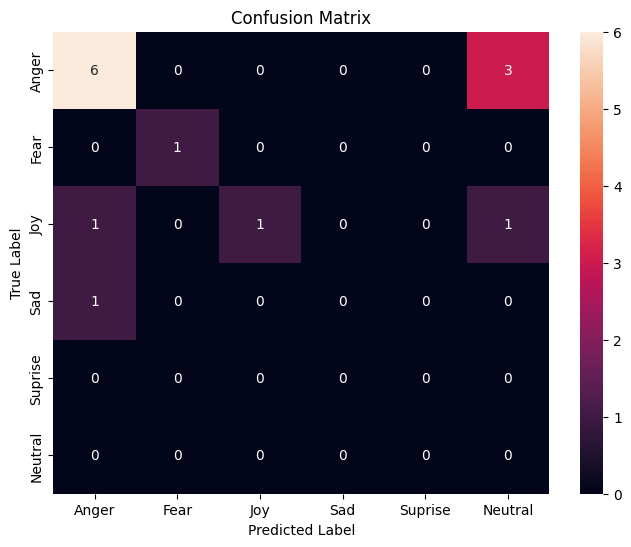

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(final_resultt['actual_emotion'], final_resultt['predicted_emotion'], labels=['Anger', 'Fear', 'Joy', 'Sad', 'Suprise', 'Neutral'])

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Anger', 'Fear', 'Joy', 'Sad', 'Suprise', 'Neutral'], yticklabels=['Anger', 'Fear', 'Joy', 'Sad', 'Suprise', 'Neutral'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [62]:
new_df = pd.read_csv('test_data.csv')
new_df.head()

,text,Emotion
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral


In [64]:
new_texts = new_df['text']  # Chọn cột chứa văn bản
new_texts_count = CountVectorizer.transform(new_texts)

TypeError: CountVectorizer.transform() missing 1 required positional argument: 'raw_documents'

In [ ]:
new_pred = logreg1.predict(new_texts_count)
new_pred

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(new_df['Emotion'], new_pred)
print("Accuracy on new dataset:", accuracy)
